In [1]:
import numpy as np
from copy import copy
from time import time


import matplotlib.pyplot as plt

import scipy.special  as sfactorial
%matplotlib inline

So, let's say we wanted to compute the Taylor series around $x_{0}=0$ of $e^{x}$, which is given by 

$$
e^{x} = \sum_{j=0}^{\infty} \frac{x^{j}}{j!}.
$$

The idea here is to keep adding terms until a term, say $x^{j}/j!$ is, in magnitude, smaller than some specified tolerance, say `tol`.  In otherwords

`while np.abs(aj) >= tol: keep doing stuff`

Here the variable `aj` stands for $x^{j}/j!$.  The variable `tol` is the value we use to determine whether a given term is too small in order to keep iterating. 

To keep going, we note that if we write 

$$
e^{x} = \sum_{j=0}^{\infty}a_{j}(x),
$$

then we see that 

$$
\frac{a_{j}(x)}{a_{j-1}(x)} = \frac{x}{j},
$$

or 

$$
a_{j}(x) = \left\{
\begin{array}{rl}
\frac{x}{j} a_{j-1}(x) & j\geq 1\\
1 & j=0
\end{array}
\right.
$$

So, if put this all together, to make this work in Python, we write 

In [2]:
def exp_func(x,tol):
    tot = 1. # for the total you wish to return 
    aj = 1. # the terms you need to update
    j = 1 # your counter
    while np.abs(aj)>=tol:
        aj *= x/j
        tot += aj
        j+=1 
        # what would you put here in order to update your term, total, and counter?
    return tot # what would you put here?

## Vectorization in NumPy

We are now going to explore a key feature of NumPy which is _vectorization_.  This is a feature whereby instead of explicitly calling a loop, NumPy just knows to iterate over every entry of a NumPy array in some reasonable manner.  

So, now let's think about how we can vectorize our function `exp_func` so that we can just pass one NumPy array `x`.  To make this work, we need to initialize our loops with  

`
tot = np.ones(x.size)
aj = np.ones(x.size)
`

which builds two NumPy arrays that are as long as `x`, and have entries equal to one.  Then, when we call 

`
aj *= x/j
`

which is equivalent to 

`
aj = aj*x/j
`

what is happening is that we multiply each entry of `aj` by each entry of the array `x/j`.  In other words, the above statement is equivalent to

`
for ll in xrange(0:x.size):
    aj[ll] *= x[ll]/j
`

but with vectorization, we do not explicitly call the `for` loop since NumPy understands to use it implicitly.  But then, how do we adjust our logic in our while loop so that we can work over an entire array of new terms `aj`?  This is where we need to make use of 

`while np.max(np.abs(aj))>=tol:`

but why?

In [3]:
def exp_func_vec(x,tol):
    tot = np.ones(x.size) # for the total you wish to return 
    aj = np.ones(x.size) # the terms you need to update
    j = 1 # your counter
    while np.max(np.abs(aj))>=tol:
        aj *= x/j
        tot += aj
        j += 1
        # what would you put here in order to update your term, total, and counter?
    return tot # what would you put here?

Time to run vectorized code was: 0.001995086669922
Time to run non-vectorized code was: 0.039157152175903


Text(0, 0.5, '$e^{x}$')

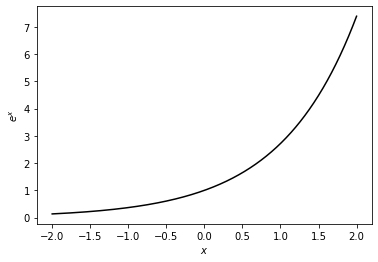

In [4]:
# You insert code which allows you to compare the performance of exp_func to exp_func_vec.  
# As a means of generating a test, use the array of x-values 

xvals = np.linspace(-2.,2.,int(1e3))

start = time()
evalsv = exp_func_vec(xvals,1e-9)
end = time()
tvec = end - start
print ("Time to run vectorized code was: %1.15f" %tvec)

# insert code here for "non-vectorized code"
start = time()
evalsp = [exp_func(xval,1e-9) for xval in xvals]
end = time()
tvec = end - start
print ("Time to run non-vectorized code was: %1.15f" %tvec)

plt.plot(xvals,evalsv,color='k')
plt.xlabel('$x$')
plt.ylabel('$e^{x}$')

In [5]:
0.039/0.001995

19.54887218045113